In [39]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# Read Data

In [40]:
path_to_processed_df = "../data/processed/P01"

#Get list of csv files
data_paths = os.listdir(path_to_processed_df)

# Keep only csv data
data_paths = [x for x in data_paths if x.endswith(".csv")]
data_paths = [os.path.join(path_to_processed_df, x) for x in data_paths]
data_paths.sort()

In [41]:
def load_data_as_dataframe(data_paths: list[str]) -> list[pd.DataFrame]:
    """ Loads the .csv file into dataframes

    :return: list[pd.DataFrames]
    """
    data = []
    for path in data_paths:
        df = pd.read_csv(path)
        # Convert 'TS_UNIX' to datetime
        df = df.set_index("TS_UNIX", drop=True)
        data.append(df)

    return data

df_list = load_data_as_dataframe(data_paths)

# Processing

In [42]:
FEATURE_NAMES = list(df_list[0].columns)
df_list[0]

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
TS_UNIX,,,,,,,
2022-06-20 16:52:00.482892032+02:00,2.627422,1.855009,4.020922,1.478189,4.339555,1.561284,3.142269
2022-06-20 16:52:00.482905088+02:00,2.444575,1.693927,3.758652,1.222329,3.966451,1.328616,2.830244
2022-06-20 16:52:00.482917888+02:00,2.270200,1.542644,3.514562,1.027031,3.598714,1.113825,2.546634
2022-06-20 16:52:00.482929920+02:00,2.121425,1.408440,3.302235,0.889588,3.246621,0.916807,2.312470
2022-06-20 16:52:00.482949888+02:00,2.007978,1.297264,3.125684,0.797827,2.916363,0.738571,2.134958
...,...,...,...,...,...,...,...
2022-06-20 16:53:27.914141952+02:00,0.532971,0.538213,0.037965,0.951213,-0.198071,0.973324,-0.842514
2022-06-20 16:53:27.914152960+02:00,0.548611,0.574675,0.023627,0.939592,-0.234455,0.972067,-0.744485
2022-06-20 16:53:27.914163968+02:00,0.564981,0.606522,-0.000629,0.910126,-0.286229,0.969688,-0.639527


In [43]:
df_scaled_list = []

for df in df_list:
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
    df_scaled_list.append(df_scaled)

In [44]:
df_scaled_list[0].describe()

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
count,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000
mean,0.498897,0.568642,0.538752,0.560380,0.521214,0.575447,0.575367
std,0.074067,0.105546,0.104231,0.108272,0.112641,0.109296,0.107549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.483348,0.546228,0.501817,0.527163,0.484041,0.547491,0.535497
50%,0.501737,0.576657,0.540619,0.567326,0.522486,0.582995,0.583697
75%,0.523226,0.605433,0.576856,0.607301,0.567517,0.616185,0.625451
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Reshape to LSTM format

In [45]:
# Validation Set
df_scaled_list_val = df_scaled_list[:2]
df_scaled_list = df_scaled_list[len(df_scaled_list_val):]

In [46]:
def stack_to_3d(df_list: list[pd.DataFrame]) -> np.array:

    sequence_length = df_list[0].shape[0]

    # Convert DataFrames to numpy arrays and reshape them
    reshaped_data = []
    for df in df_list:
        # Convert DataFrame to numpy array
        data_array = df.values  # Assuming your DataFrame is named 'df'

        # Calculate the number of sequences that can be extracted
        num_sequences = len(data_array) - sequence_length + 1

        # Extract sequences of length 'sequence_length'
        for i in range(num_sequences):
            sequence = data_array[i:i + sequence_length]
            reshaped_data.append(sequence)

    # Convert reshaped_data to a numpy array
    reshaped_data = np.array(reshaped_data)
    return reshaped_data

reshaped_data = stack_to_3d(df_scaled_list)
reshaped_data_val = stack_to_3d(df_scaled_list_val)

# Check the shape of the reshaped data
print(reshaped_data.shape)
print(reshaped_data_val.shape)

(8, 10990, 7)
(2, 10990, 7)


# Modelling

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Dense, Bidirectional, TimeDistributed, Reshape

# Sampling layer
@tf.keras.saving.register_keras_serializable()
class Sampling(tf.keras.layers.Layer):
    def call(self, args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [48]:
# Hyperparams
sequence_length = df_scaled_list[0].shape[0]
latent_dims = 2
num_features = df_scaled_list[0].shape[1]


# Encoder Architecture
inputs = Input(shape=(sequence_length, num_features))
z = LSTM(128)(inputs)
z_mean = Dense(latent_dims, activation="tanh")(z)
z_log_var = Dense(latent_dims, activation="tanh")(z)
codings = Sampling()([z_mean, z_log_var])
encoder = tf.keras.Model(inputs=[inputs], outputs = [z_mean, z_log_var, codings], name="encoder")

# Decoder Architecture
decoder_inputs = Input(shape=(latent_dims,))
x = Dense(sequence_length * 1, name='Decode_1')(decoder_inputs)
x = Reshape((sequence_length, 1), name='Decode_2')(x)
x = LSTM(num_features, activation='tanh', return_sequences=True)(x)
x = TimeDistributed(Dense(num_features, activation='linear'), name='Decoder_Output_Layer')(x)
decoder = tf.keras.Model(inputs=decoder_inputs, outputs=x, name="decoder")

# Connecting Encoder + Decoder
_, _, codings = encoder(inputs)
reconstructions = decoder(codings)
vae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

# Latent Loss
latent_loss = -0.5 * tf.keras.backend.sum(
                1 + z_mean - tf.keras.backend.exp(z_log_var) - tf.keras.backend.square(z_mean),
            axis=-1)
vae.add_loss(tf.keras.backend.mean(latent_loss) / sequence_length)

# Compile VAE
vae.compile(loss="mse", optimizer="adam")

In [49]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 10990, 7)]           0         []                            
                                                                                                  
 lstm_3 (LSTM)               (None, 128)                  69632     ['input_5[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 2)                    258       ['lstm_3[0][0]']              
                                                                                                  
 dense_7 (Dense)             (None, 2)                    258       ['lstm_3[0][0]']              
                                                                                            

In [50]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2)]               0         
                                                                 
 Decode_1 (Dense)            (None, 10990)             32970     
                                                                 
 Decode_2 (Reshape)          (None, 10990, 1)          0         
                                                                 
 lstm_4 (LSTM)               (None, 10990, 7)          252       
                                                                 
 Decoder_Output_Layer (Time  (None, 10990, 7)          56        
 Distributed)                                                    
                                                                 
Total params: 33278 (129.99 KB)
Trainable params: 33278 (129.99 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [51]:
# If this is outcommented, use the tf.keras.load_model() function below
#history = vae.fit(reshaped_data, reshaped_data, epochs=32, batch_size=1, validation_data=(reshaped_data_val, reshaped_data_val))

Epoch 1/32

8/8 [==============================] - 88s 11s/step - loss: 0.2522 - val_loss: 0.2638
Epoch 2/32
8/8 [==============================] - 82s 10s/step - loss: 0.2333 - val_loss: 0.2421
Epoch 3/32
8/8 [==============================] - 83s 10s/step - loss: 0.2104 - val_loss: 0.2153
Epoch 4/32
8/8 [==============================] - 80s 10s/step - loss: 0.1825 - val_loss: 0.1797
Epoch 5/32
8/8 [==============================] - 80s 10s/step - loss: 0.1449 - val_loss: 0.1322
Epoch 6/32
8/8 [==============================] - 83s 10s/step - loss: 0.1009 - val_loss: 0.0866
Epoch 7/32
8/8 [==============================] - 83s 10s/step - loss: 0.0808 - val_loss: 0.0729
Epoch 8/32
8/8 [==============================] - 84s 11s/step - loss: 0.0705 - val_loss: 0.0617
Epoch 9/32
8/8 [==============================] - 83s 10s/step - loss: 0.0590 - val_loss: 0.0565
Epoch 10/32
8/8 [==============================] - 79s 10s/step - loss: 0.0522 - val_loss: 0.0478
Epoch 11/32
8/8 [===========

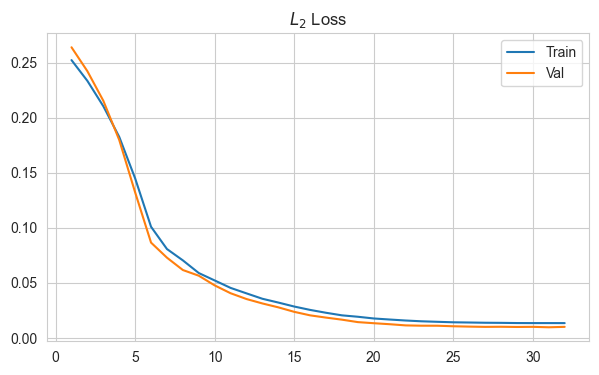

In [67]:
def plot_history(history):
    loss_dict = history.history

    loss_train = loss_dict["loss"]
    loss_val = loss_dict["val_loss"]
    x = [i+1 for i in range(0, len(loss_val))]

    plt.figure(figsize=(7, 4))
    plt.title("$L_2$ Loss")
    sns.lineplot(x=x, y=loss_train, label="Train")
    sns.lineplot(x=x, y=loss_val, label="Val")

    # Saving
    plt.savefig("../models/e32_b1_40k_params/assets/history.png")

#plot_history(history)

## Save or load existing model

In [66]:
# Save model
vae.save("../models/e32_b1_40k_params")

INFO:tensorflow:Assets written to: ../models/e32_b1_40k_params\assets


INFO:tensorflow:Assets written to: ../models/e32_b1_40k_params\assets


In [54]:
# Load Model
#vae = tf.keras.models.load_model("../models/e32-b1_final_dir")#, custom_objects={'CustomLayer': Sampling})

In [55]:
z_mean, z_log_var, codings = encoder(reshaped_data)

<Axes: >

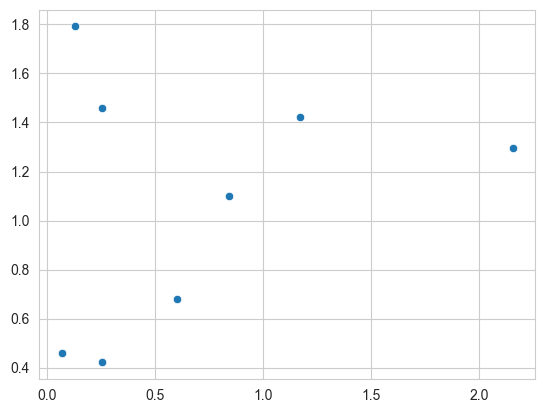

In [56]:
sns.scatterplot(x=codings[:,0], y=codings[:,1]) # TODO: USE z_mean here

# Synthesize

In [57]:
val_sample = np.expand_dims(reshaped_data_val[0], axis=0)
train_sample = np.expand_dims(reshaped_data[0], axis=0)
print(val_sample.shape)
print(train_sample.shape)

(1, 10990, 7)
(1, 10990, 7)


In [58]:
val_sample_reconstructed = vae.predict(val_sample)
train_sample_reconstructed = vae.predict(train_sample)

1/1 [==============================] - 1s 739ms/step


In [59]:
val_sample_reconstructed[0]

array([[0.06760918, 0.10454983, 0.03088247, ..., 0.1222491 , 0.09387884,
        0.1278552 ],
       [0.09595673, 0.14366971, 0.03549557, ..., 0.10859808, 0.13740125,
        0.18358928],
       [0.12401266, 0.1831183 , 0.04831754, ..., 0.10481595, 0.17622504,
        0.22908899],
       ...,
       [0.5000617 , 0.46871227, 0.48521337, ..., 0.4902799 , 0.50209004,
        0.51544917],
       [0.50012165, 0.46817955, 0.48416412, ..., 0.48970485, 0.5034573 ,
        0.5163803 ],
       [0.49942678, 0.4680122 , 0.48552853, ..., 0.49172777, 0.50068927,
        0.5135004 ]], dtype=float32)

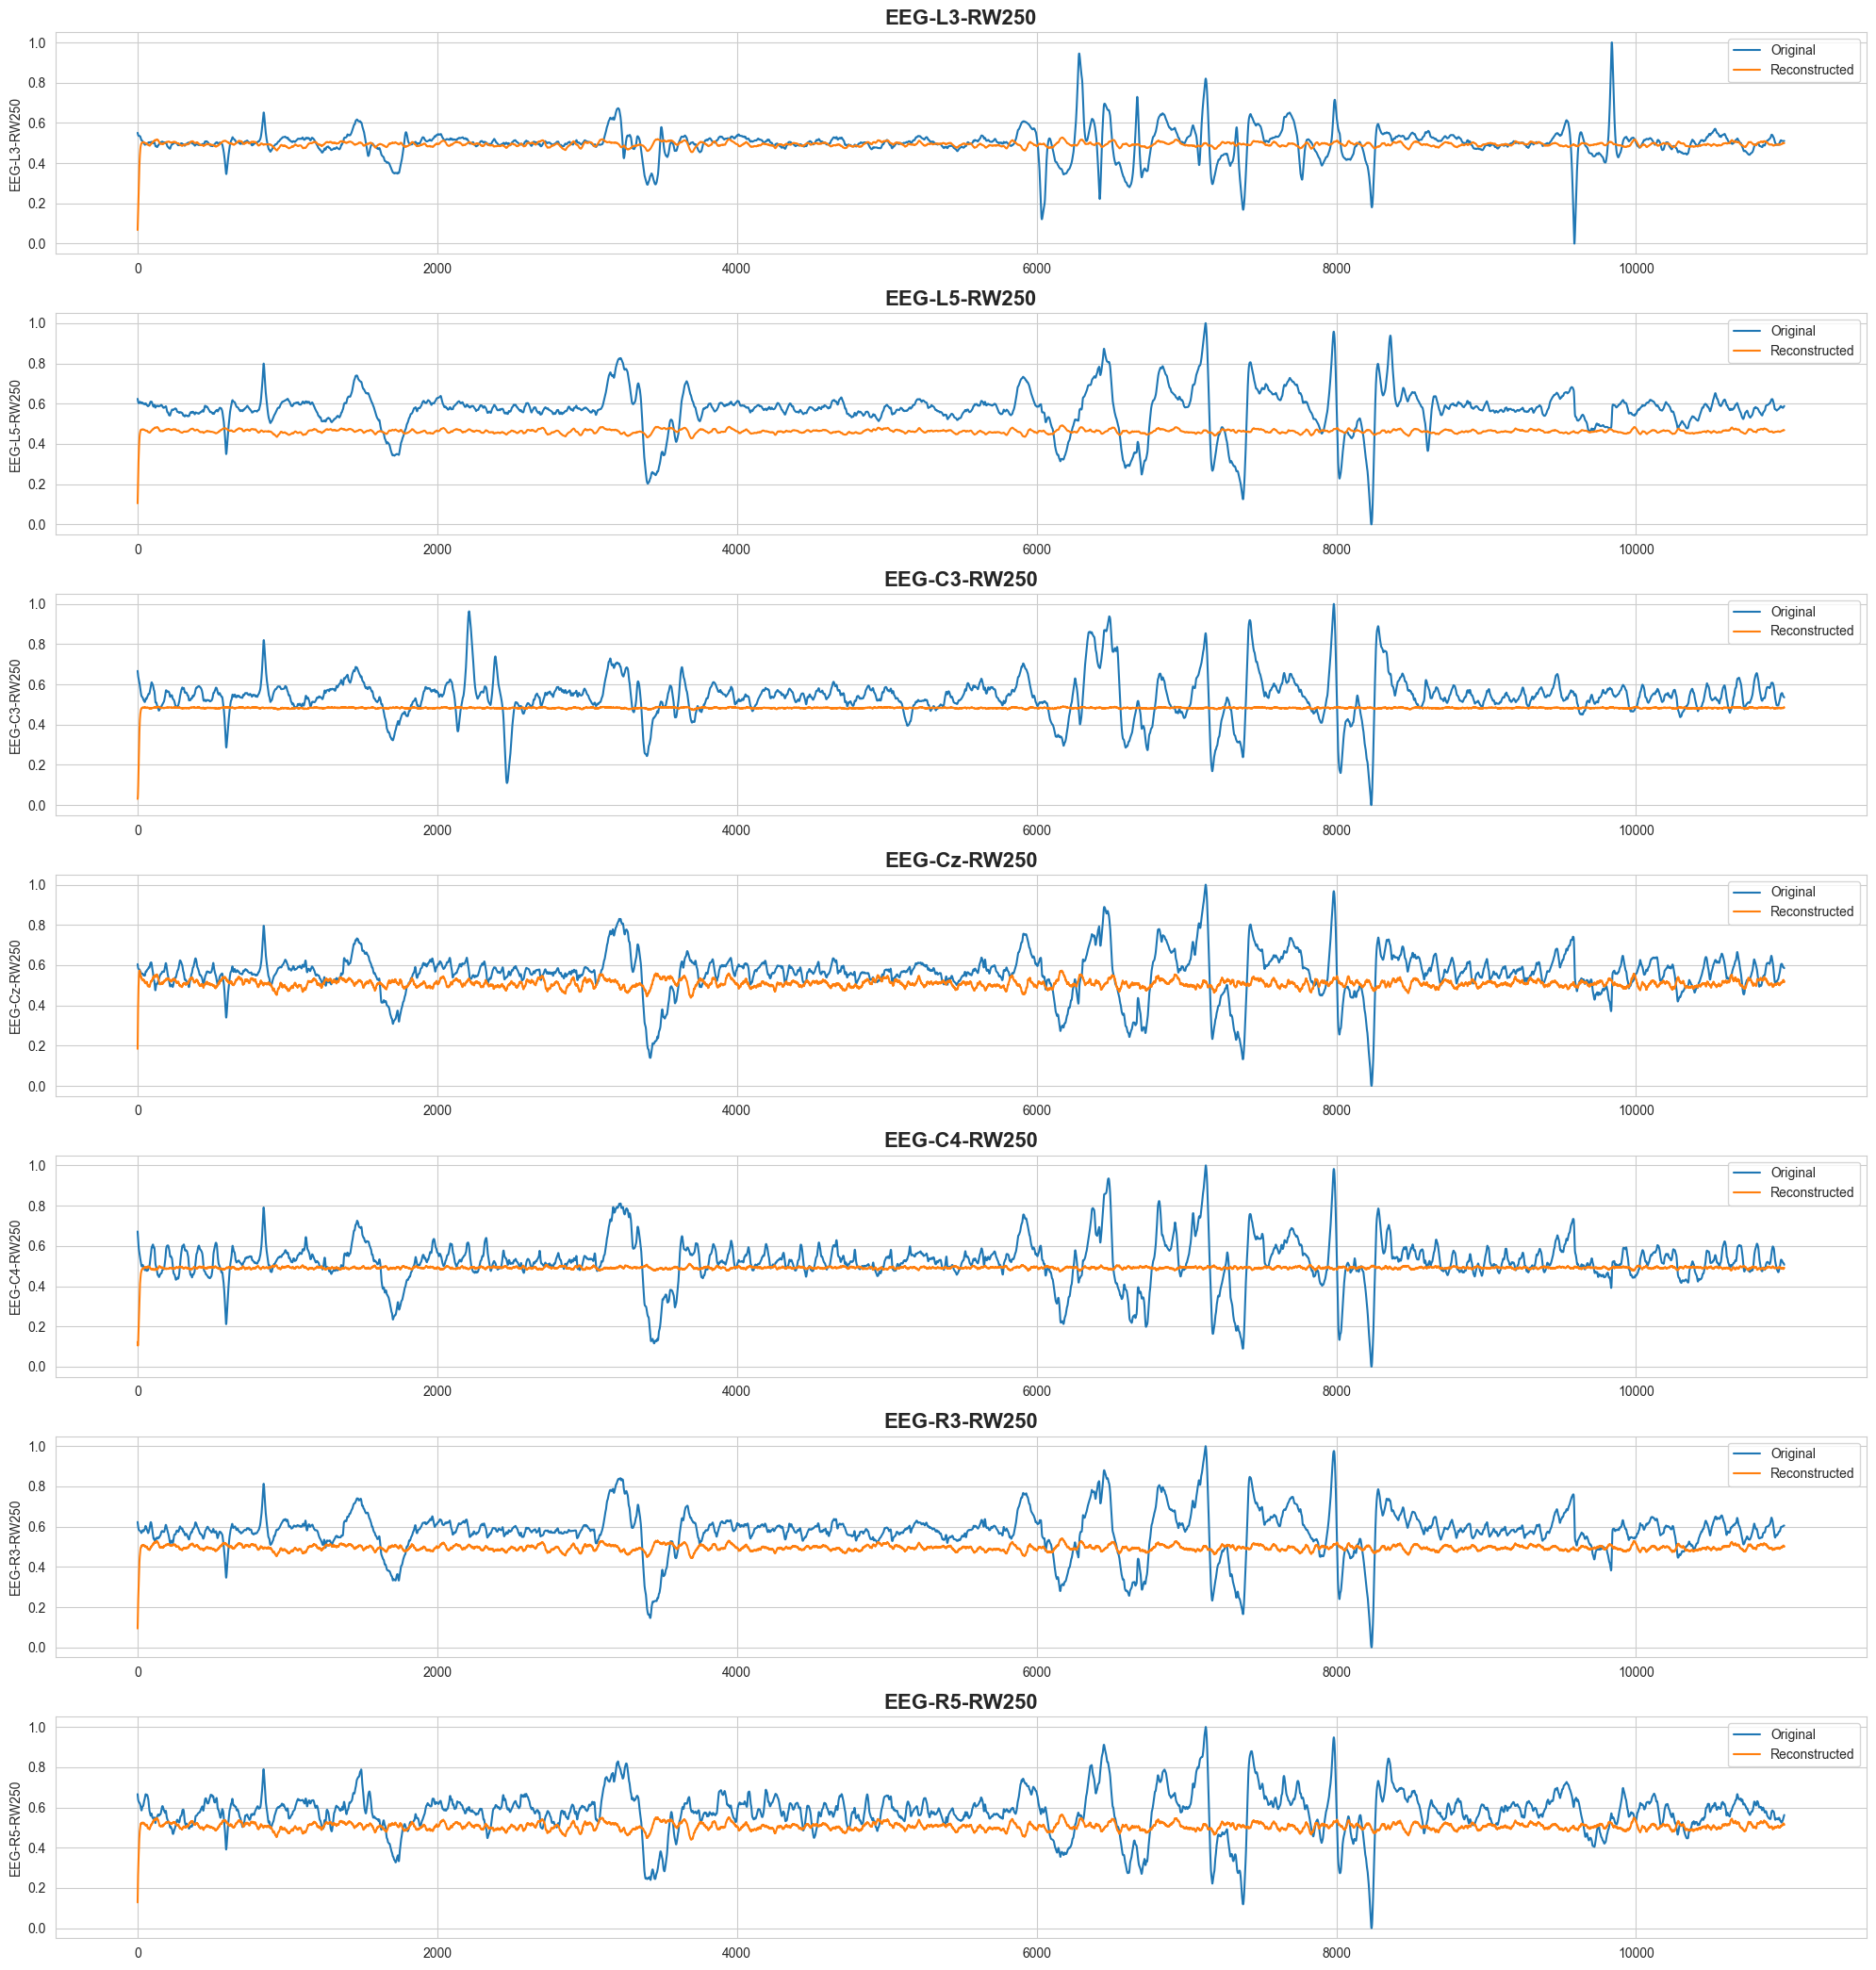

In [60]:
# Compare original and reconstruction
def compare_original_and_reconstruction(sample: np.array, sample_reconstructed: np.array) -> None:
    df_sample = pd.DataFrame(sample, columns=FEATURE_NAMES)
    df_reconstructed = pd.DataFrame(sample_reconstructed, columns=FEATURE_NAMES)

    fig, axes = plt.subplots(nrows=len(FEATURE_NAMES), ncols=1, figsize=(20, len(FEATURE_NAMES)*3))
    for col, ax in zip(FEATURE_NAMES, axes.flatten()):
        sns.lineplot(data=df_sample, x=df_sample.index, y=col, ax=ax, label="Original")
        sns.lineplot(data=df_reconstructed, x=df_reconstructed.index, y=col, ax=ax, label="Reconstructed")
        ax.set_title(col, fontweight="bold", size=16)
    fig.tight_layout()


compare_original_and_reconstruction(val_sample[0], val_sample_reconstructed[0])

## Or generate complete new ones by sampling from latent space ...

In [61]:
# Generate synthetic data function using the decoder part of the VAE
def generate_time_series(num_samples, latent_dims):
    # Sample from the latent space
    latent_samples = np.random.normal(size=(num_samples, latent_dims))
    print(f"Latent Samples: {latent_samples}")
    # Generate synthetic data using the decoder model
    synthetic_data = decoder(latent_samples).numpy()
    return synthetic_data

# Generate synthetic time series data
num_samples = 1
synthetic_time_series = generate_time_series(num_samples, latent_dims)
print(synthetic_time_series.shape)

Latent Samples: [[-1.86982938  0.47479788]]
(1, 10990, 7)


In [62]:
test = synthetic_time_series[0]
test.shape

(10990, 7)

In [63]:
test_df = pd.DataFrame(test, columns=df_scaled_list[0].columns)#, index=df_scaled_list[0].index)
test_df

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
0,0.062714,0.085094,0.058406,0.117354,0.161203,0.066979,0.086492
1,0.086667,0.103884,0.079839,0.140581,0.174330,0.091411,0.114316
2,0.109909,0.124494,0.098890,0.169800,0.184761,0.117299,0.143679
3,0.132274,0.144655,0.120521,0.194779,0.198580,0.140419,0.168312
4,0.153713,0.163946,0.143930,0.215970,0.215113,0.161332,0.189086
...,...,...,...,...,...,...,...
10985,0.482923,0.453410,0.483028,0.485492,0.498204,0.478692,0.484933
10986,0.483570,0.453123,0.480834,0.491064,0.494974,0.482370,0.488784
10987,0.484114,0.453752,0.481306,0.491960,0.494274,0.482533,0.489756
10988,0.483602,0.453606,0.482129,0.489207,0.495625,0.480701,0.487813


## Visualize Synthetic Samples

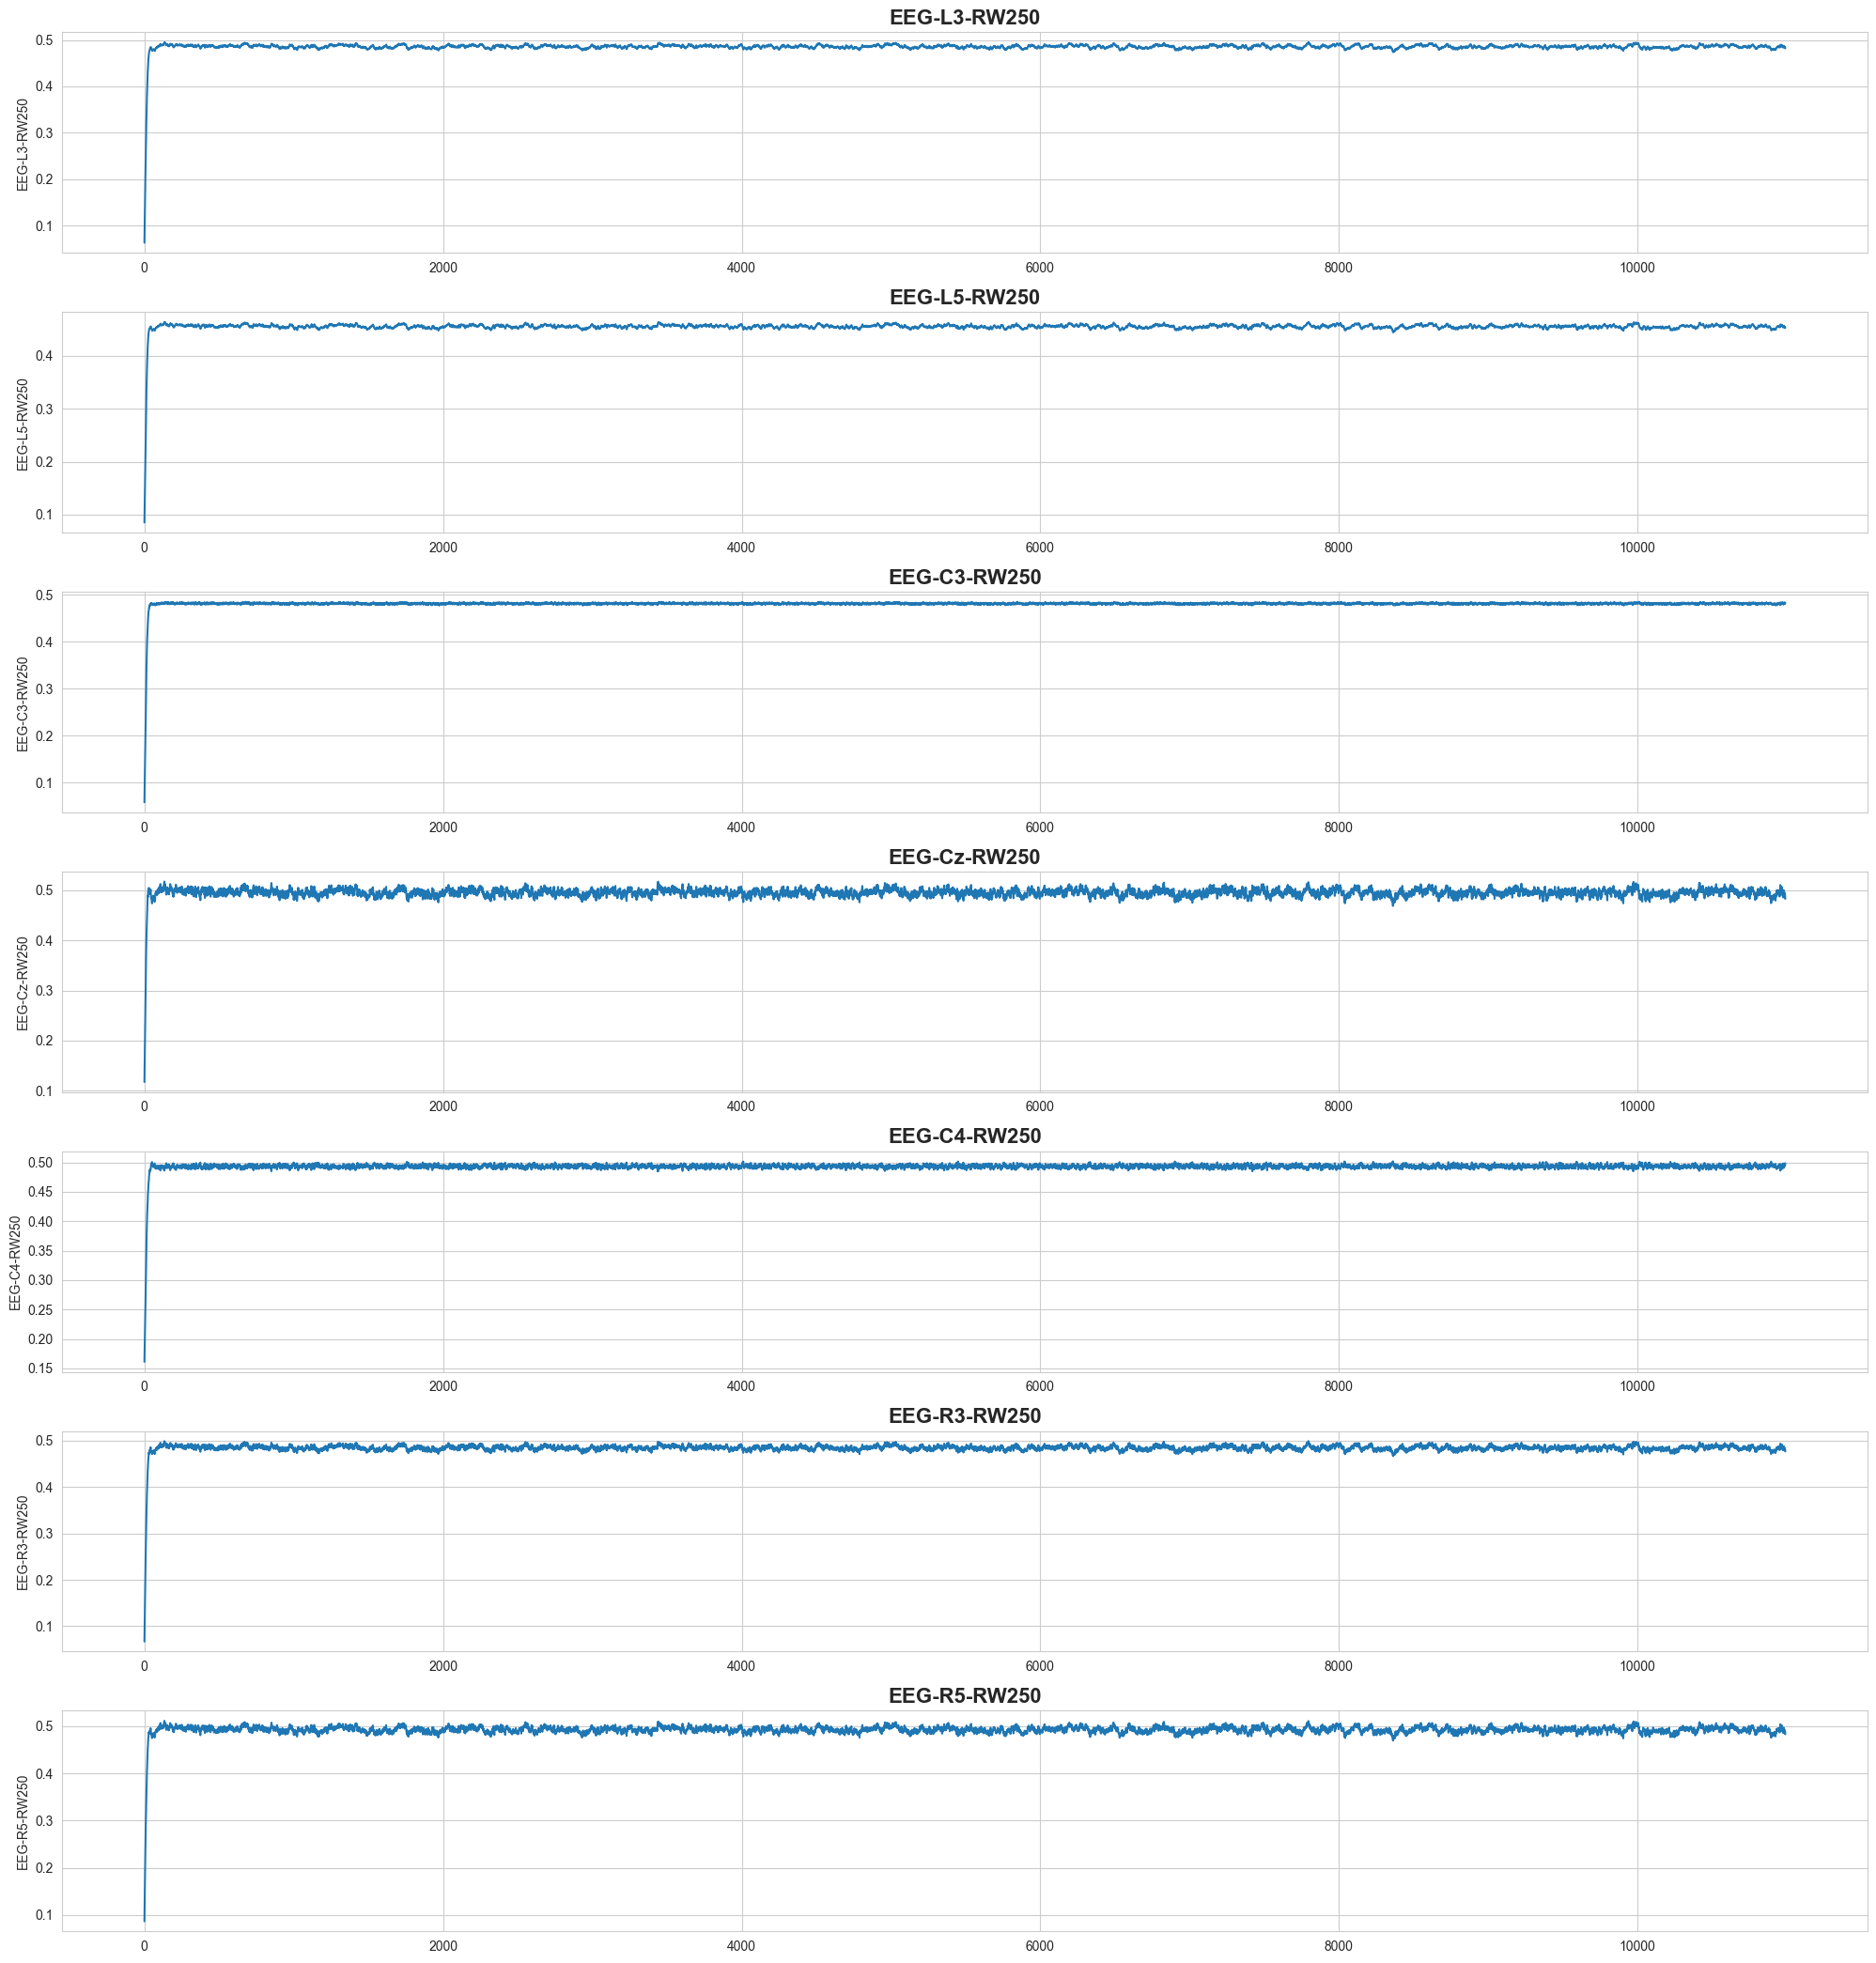

In [64]:
def plot_all_time_series(df: pd.DataFrame) -> None:
    """ Plots all Time Series (all float64 columns) in the provided DataFrame

    :param df: pd.DataFrame -- Input DataFrame
    :param time_col: str -- Name of the time column
    :return: None
    """
    cols = [x for x in list(df.columns) if x.endswith(f"RW{250}")]

    fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(20, len(cols)*3))
    for col, ax in zip(cols, axes.flatten()):
        sns.lineplot(data=df, x=df.index, y=col, ax=ax)
        ax.set_title(col, fontweight="bold", size=16)
    fig.tight_layout()

plot_all_time_series(test_df)

____________
# Visualize Test and Reconstruction Sample using TSNE

In [65]:
# TBD